DigiNsure Inc. is an innovative insurance company focused on enhancing the efficiency of processing claims and customer service interactions. Their newest initiative is digitizing all historical insurance claim documents, which includes improving the labeling of some IDs scanned from paper documents and identifying them as primary or secondary IDs.

To help them in their effort, you'll be using multi-modal learning to train an Optical Character Recognition (OCR) model. To improve the classification, the model will use **images** of the scanned documents as input and their **insurance type** (home, life, auto, health, or other). Integrating different data modalities (such as image and text) enables the model to perform better in complex scenarios, helping to capture more nuanced information. The **labels** that the model will be trained to identify are of two types: a primary and a secondary ID, for each image-insurance type pair.

Develop an Optical Character Recognition (OCR) model to sort categories of ID codes extracted from scanned insurance documents.

TASKS:

1 -

Create a model named OCRModel in PyTorch. It should have the following specifications:

2 -

A network architecture with different layers to ingest both the image and the type. The layers relative to the image should be saved as a sequential module called image_layer, and compatible the input dimensions of the images (64x64 pixels size).
A Conv2d layer with kernel size 3x3, padding 1, and appropriate in/out channels.

3 -

Train the Model: call the model as model and use an appropriate optimizer and loss function to train it. Iterate through your training for ten epochs.

In [ ]:
%pip install torchvision
%pip install matplotlib
%pip install numpy
%pip install pickle
%pip install torch
%pip install random
%pip install string
%pip install PIL
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


### Imports


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from project_utils import ProjectDataset
import pickle 
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

## Model

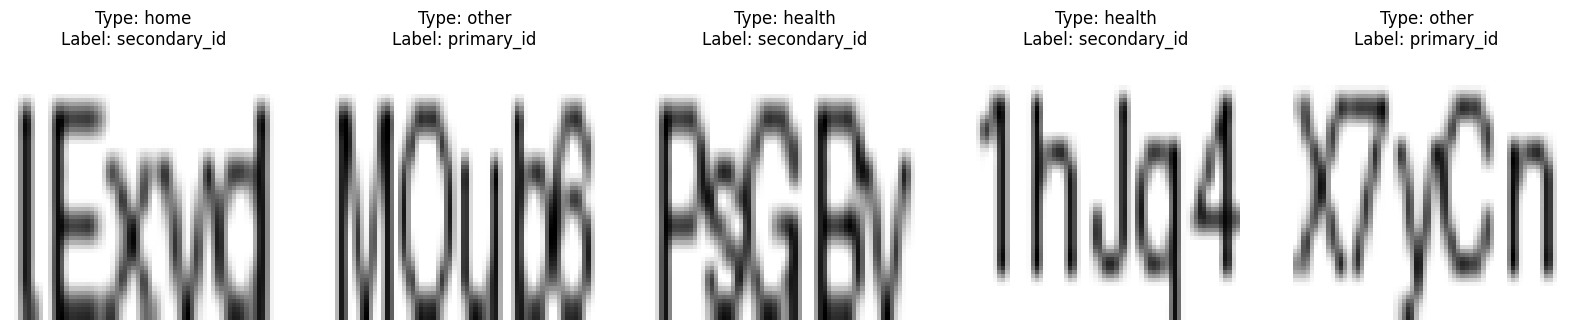

In [5]:
dataset = pickle.load(open('ocr_insurance_dataset.pkl', 'rb'))

def show_dataset_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, min(num_images, len(dataset)), figsize=(20, 4))
    for ax, idx in zip(axes, np.random.choice(len(dataset), min(num_images, len(dataset)), False)):
        img, lbl = dataset[idx]
        ax.imshow((img[0].numpy() * 255).astype(np.uint8).reshape(64,64), cmap='gray'), ax.axis('off')
        ax.set_title(f"Type: {list(dataset.type_mapping.keys())[img[1].tolist().index(1)]}\nLabel: {list(dataset.label_mapping.keys())[list(dataset.label_mapping.values()).index(lbl)]}")
    plt.show()

show_dataset_images(dataset)

In [6]:
class OCRModel(nn.Module):
    def __init__(self):
        super(OCRModel,self).__init__()
        self.image_layer = nn.Sequential(
        	nn.Conv2d(1,16,kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16*32*32, 128)
        )
        self.type_layer = nn.Sequential(
        	nn.Linear(5,10),
            nn.ReLU(),
        )
        self.classifier = nn.Sequential(
        	nn.Linear(128 + 10, 64),
            nn.ReLU(),
            nn.Linear(64,2)
        )
        
    def forward(self,x_image,x_type):
        x_image = self.image_layer(x_image)
        x_type = self.type_layer(x_type)
        x = torch.cat((x_image,x_type),dim=1)
        return self.classifier(x)

train_dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

model = OCRModel()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):  
    for (images, types), labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(images, types)
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.7272277474403381
Epoch 2, Loss: 0.7239760160446167
Epoch 3, Loss: 0.6689893007278442
Epoch 4, Loss: 0.7289625406265259
Epoch 5, Loss: 0.4767683148384094
Epoch 6, Loss: 0.4030088484287262
Epoch 7, Loss: 0.21427097916603088
Epoch 8, Loss: 0.28343987464904785
Epoch 9, Loss: 0.20342548191547394
Epoch 10, Loss: 0.054072268307209015
